In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import datetime as dt

# Recency 

In [35]:
Recency_data = pd.read_csv('Recency.csv')
Recency_data

,Customer_ID,Transaction_ID,Transaction_Date,Product_ID,Product_Category,Quantity,Average_Amount,Shipping_Fee,Coupon_Status,Gender,Customer_Region,Membership_Duration
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...
995,USER_0595,Transaction_0524,2019-01-08,Product_0976,Nest-USA,1,122.77,6.5,Not Used,남,Washington DC,43
996,USER_0595,Transaction_0525,2019-01-08,Product_0976,Nest-USA,1,122.77,6.5,Not Used,남,Washington DC,43
997,USER_0595,Transaction_0526,2019-01-08,Product_0898,Drinkware,1,9.27,6.5,Used,남,Washington DC,43
998,USER_0595,Transaction_0526,2019-01-08,Product_0908,Drinkware,1,2.05,6.5,Used,남,Washington DC,43


In [36]:
# Recency 계산 : 최소 및 최대 거래 날짜를 기준으로 하여 모든 날짜를 계산
min_transaction_date = pd.to_datetime(Recency_data['Transaction_Date']).min()
max_transaction_date = pd.to_datetime(Recency_data['Transaction_Date']).max()

Recency_data['Recency'] = (max_transaction_date - pd.to_datetime(Recency_data['Transaction_Date'])).dt.days

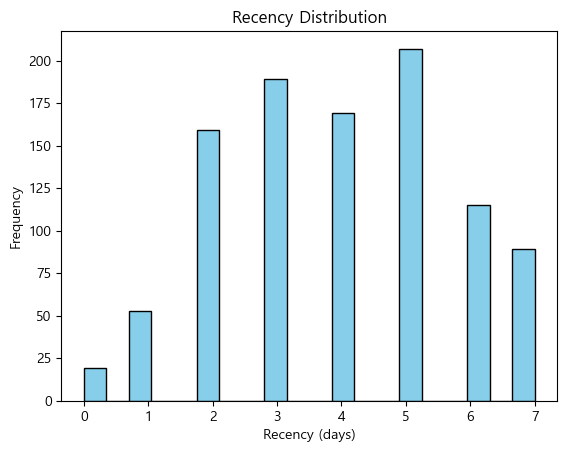

In [37]:
# Recency 시각화
plt.hist(Recency_data['Recency'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.title('Recency Distribution')
plt.show()

In [38]:
# 거래기간을 5단계로 나누어서 분류하기
recency_labels = ['Very Recent', 'Recent', 'Neutral', 'Distant', 'Very Distant']
Recency_data['Recency_Category'] = pd.cut(Recency_data['Recency'], bins=5, labels=recency_labels)

### Recency에 따른 고객 그룹의 특징
- Recency_Category: Recency 범주, "Very Recent"부터 "Very Distant"까지의 다섯 가지 범주가 있음
- Gender: 해당 Recency 범주에 속하는 고객들의 성별
- Customer_Region: 해당 Recency 범주에 속하는 고객들이 가장 많이 거주하는 지역
- Membership_Duration: 해당 Recency 범주에 속하는 고객들의 평균 가입 기간

In [39]:
# Recency 범주에 따라 고객을 분류한 후, 해당 분류에 해당하는 고객들의 특징 확인
recency_analysis = Recency_data.groupby('Recency_Category').agg({
    'Gender': pd.Series.mode,
    'Customer_Region': pd.Series.mode,
    'Membership_Duration': 'mean'
}).reindex(recency_labels).reset_index()

C:\Windows\Temp\ipykernel_10504\2090426556.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recency_analysis = Recency_data.groupby('Recency_Category').agg({


In [40]:
print(recency_analysis)

  Recency_Category Gender Customer_Region  Membership_Duration
0      Very Recent      남   Washington DC            40.861111
1           Recent      남        New York            32.383648
2          Neutral      여      California            24.310056
3          Distant      여         Chicago            28.193237
4     Very Distant      여         Chicago            30.117647


- "Very Recent" 범주의 고객들은 주로 남성이며, 주로 Washington DC에 거주하며, 평균적으로 40.86 일의 가입 기간을 가지고 있음
- "Recent" 범주의 고객들은 주로 남성이며, 주로 New York에 거주하며, 평균적으로 32.38 일의 가입 기간을 가지고 있음
- "Neutral" 범주의 고객들은 주로 여성이며, 주로 California에 거주하며, 평균적으로 24.31 일의 가입 기간을 가지고 있음
- "Distant" 범주의 고객들은 주로 여성이며, 주로 Chicago에 거주하며, 평균적으로 28.19 일의 가입 기간을 가지고 있음
- "Very Distant" 범주의 고객들은 주로 여성이며, 주로 Chicago에 거주하며, 평균적으로 30.12 일의 가입 기간을 가지고 있음


In [41]:
# 윈도우 운영체제에서 한글 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

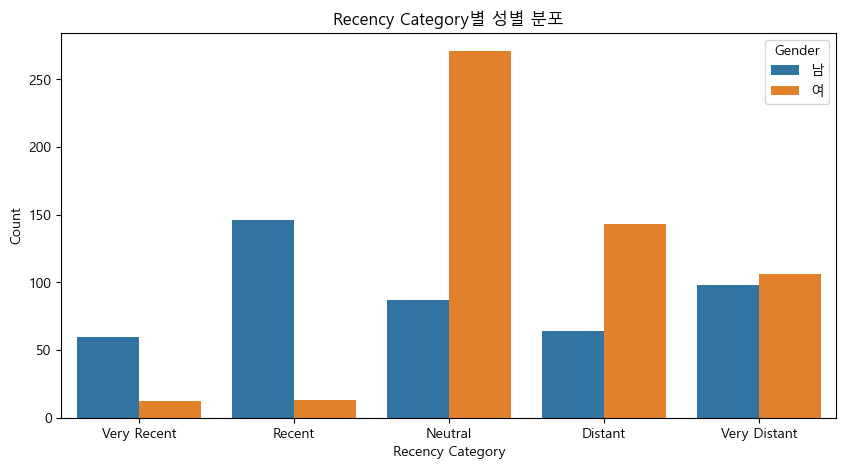

In [42]:
# Recency 단계에 따른 남/여 성비 비교
plt.figure(figsize=(10, 5))
sns.countplot(x='Recency_Category', hue='Gender', data=Recency_data)
plt.title('Recency Category별 성별 분포')
plt.xlabel('Recency Category')
plt.ylabel('Count')
plt.show()

C:\Windows\Temp\ipykernel_10504\1204007209.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Recency_Category', y='Membership_Duration', data=Recency_data, ci=None)


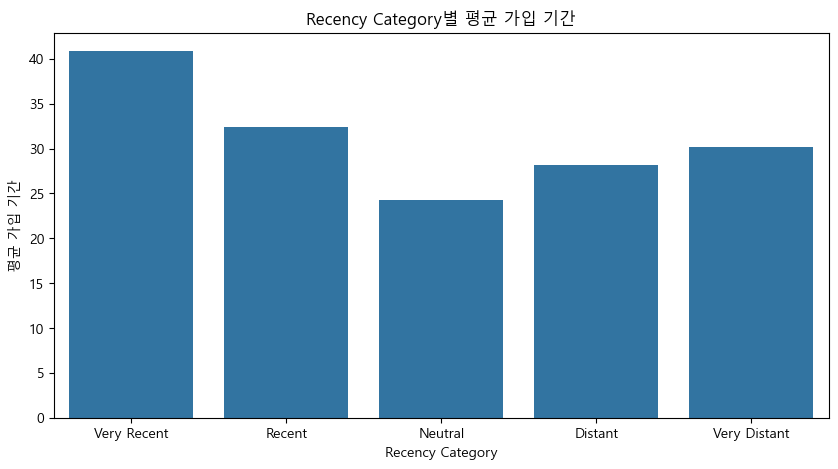

In [43]:
# Recency 단계에 따른 가입 기간 비교
plt.figure(figsize=(10, 5))
sns.barplot(x='Recency_Category', y='Membership_Duration', data=Recency_data, ci=None)
plt.title('Recency Category별 평균 가입 기간')
plt.xlabel('Recency Category')
plt.ylabel('평균 가입 기간')
plt.show()

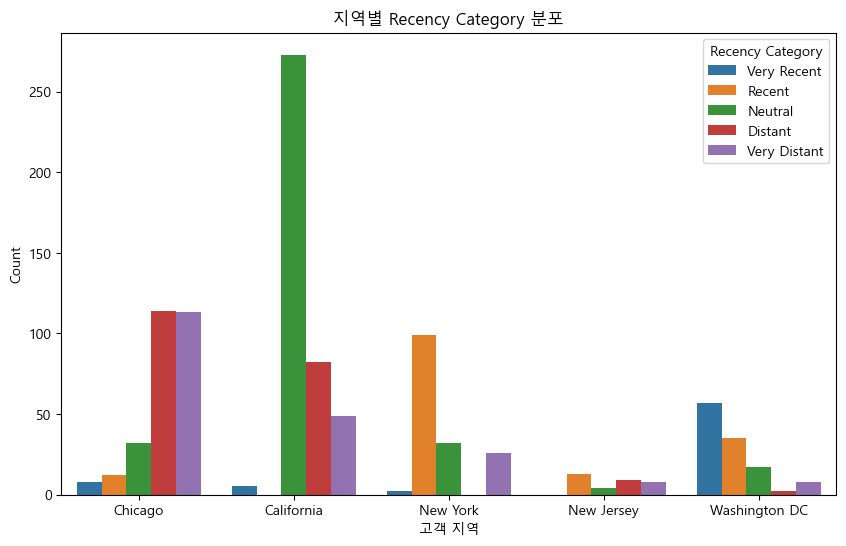

In [44]:
# 지역별 세분화하여 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Region', hue='Recency_Category', data=Recency_data)
plt.title('지역별 Recency Category 분포')
plt.xlabel('고객 지역')
plt.ylabel('Count')
plt.legend(title='Recency Category')
plt.show()

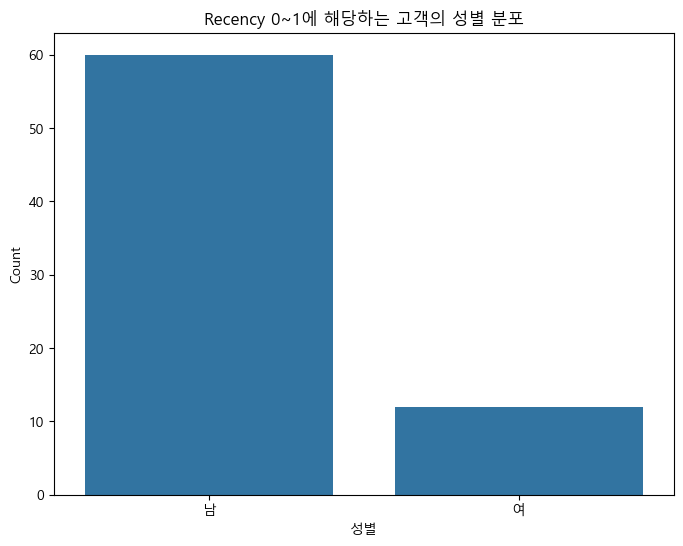

In [45]:
# Recency가 0~1에 해당하는 고객 세분화
Recency_0_to_1 = Recency_data[(Recency_data['Recency'] >= 0) & (Recency_data['Recency'] <= 1)]

# 성별 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=Recency_0_to_1)
plt.title('Recency 0~1에 해당하는 고객의 성별 분포')
plt.xlabel('성별')
plt.ylabel('Count')
plt.show()

# Frequency 

In [46]:
Frequency_data = pd.read_csv('Frequency.csv')
Frequency_data

,Customer_ID,Transaction_Count,Gender,Customer_Region,Membership_Duration
0,USER_1358,297,남,Chicago,12
1,USER_0190,44,남,California,43
2,USER_0066,42,남,Chicago,33
3,USER_0345,1,여,California,30
4,USER_0683,6,남,California,49
...,...,...,...,...,...
995,USER_1158,86,여,California,19
996,USER_0330,61,여,Chicago,15
997,USER_0455,16,여,California,29
998,USER_1151,23,남,Chicago,7


### Frequency에 따른 고객 그룹의 특징
- Frequency_Segment: Frequency 범주, "5+"부터 "1"까지의 다섯 가지 범주가 있음

In [47]:
# Frequency 분석 : 각 고객의 거래 빈도에 따라 분류
freq_bins = [0, 1, 2, 3, 5, float('inf')]  # 거래 빈도 구간 설정
freq_labels = ['1', '2', '3', '4-5', '5+']  # 구간별 라벨 설정
Frequency_data['Frequency_Segment'] = pd.cut(Frequency_data['Transaction_Count'], bins=freq_bins, labels=freq_labels)

In [48]:
# 각 단계 고객 수를 파악
freq_segment_counts = Frequency_data['Frequency_Segment'].value_counts()

print("Frequency Segment 별 고객 수:")
print(freq_segment_counts)

Frequency Segment 별 고객 수:
Frequency_Segment
5+     856
4-5     46
1       39
2       31
3       28
Name: count, dtype: int64


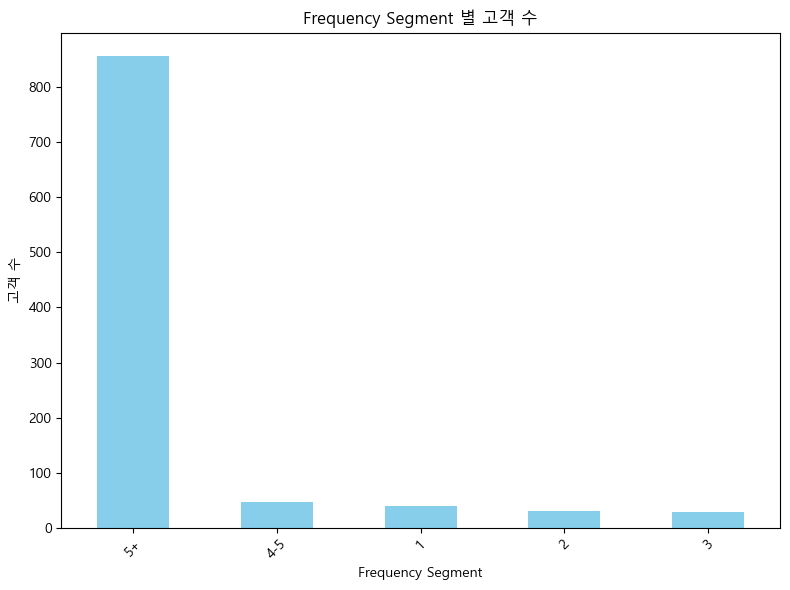

In [49]:
plt.figure(figsize=(8, 6))
freq_segment_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Segment 별 고객 수')
plt.xlabel('Frequency Segment')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
# Frequency 분석 : 각 고객의 거래 빈도에 따라 분류
freq_bins = [0, 1, 2, 3, 5, 10, 15, 20, float('inf')]  # 거래 빈도 구간 설정
freq_labels = ['1', '2', '3', '4-5', '6-10', '11-15', '16-20', '20+']  # 구간별 라벨 설정
Frequency_data['Frequency_Segment'] = pd.cut(Frequency_data['Transaction_Count'], bins=freq_bins, labels=freq_labels)

In [68]:
# 각 단계 고객 수를 파악
freq_segment_counts = Frequency_data['Frequency_Segment'].value_counts()

print("Frequency Segment 별 고객 수:")
print(freq_segment_counts)

Frequency Segment 별 고객 수:
Frequency_Segment
20+      529
11-15    119
6-10     110
16-20     98
4-5       46
1         39
2         31
3         28
Name: count, dtype: int64


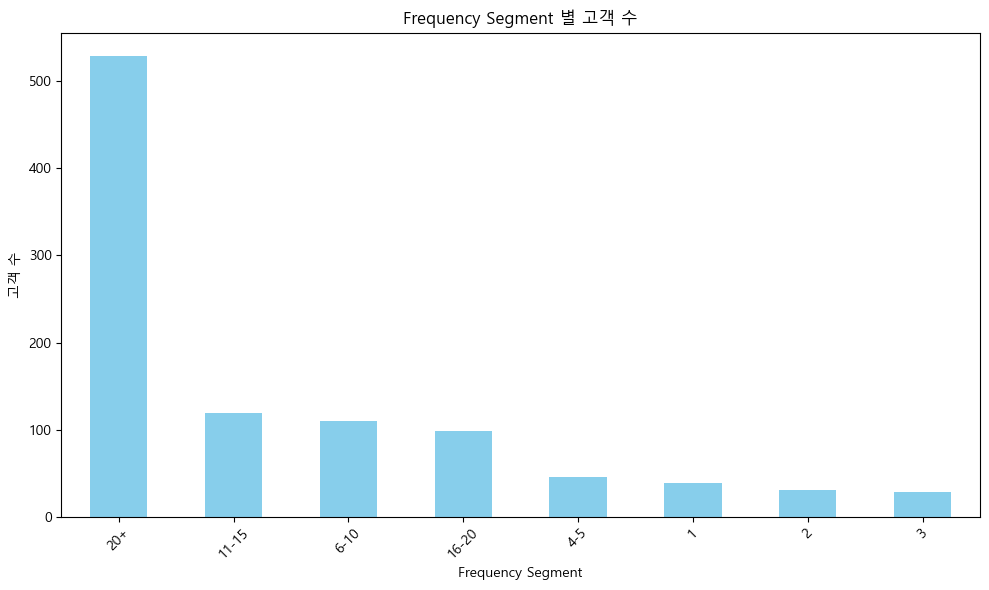

In [69]:
plt.figure(figsize=(10, 6))
freq_segment_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Segment 별 고객 수')
plt.xlabel('Frequency Segment')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
# 20+ 범주에 속하는 고객 필터링
freq_20plus_customers = Frequency_data[Frequency_data['Frequency_Segment'] == '20+']

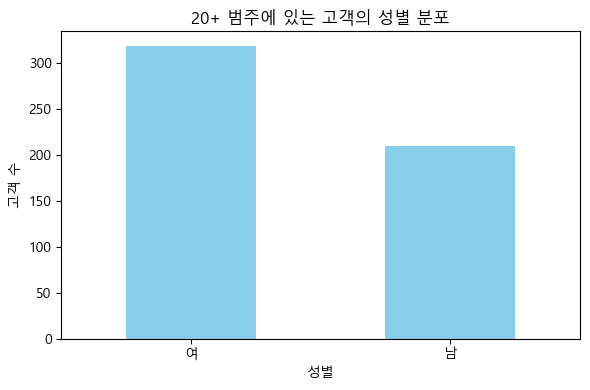

In [52]:
# 성별 분포 시각화
gender_counts = freq_20plus_customers['Gender'].value_counts()
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color='skyblue')
plt.title('20+ 범주에 있는 고객의 성별 분포')
plt.xlabel('성별')
plt.ylabel('고객 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


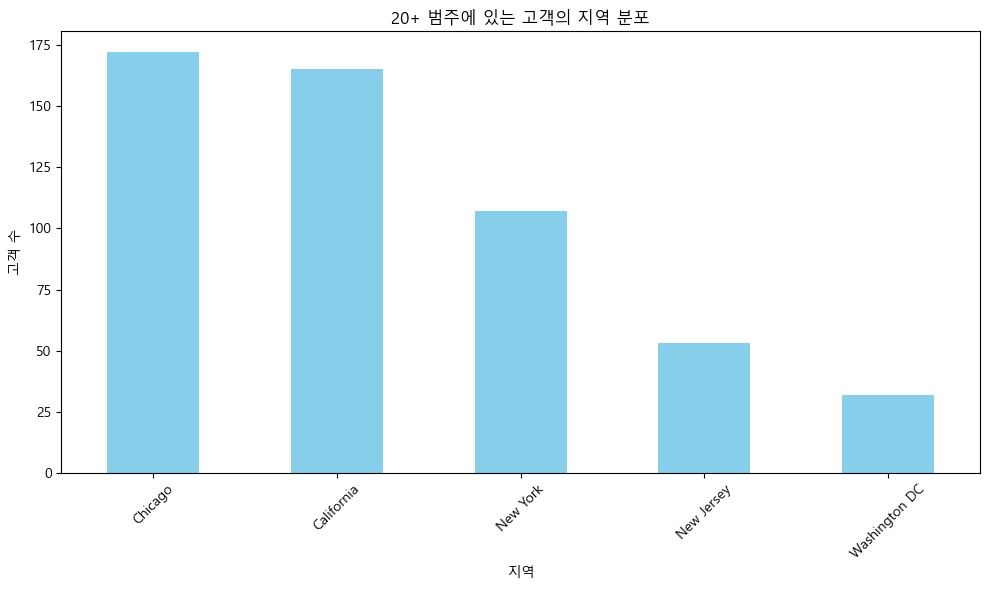

In [53]:
# 지역 분포 시각화
region_counts = freq_20plus_customers['Customer_Region'].value_counts()
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('20+ 범주에 있는 고객의 지역 분포')
plt.xlabel('지역')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

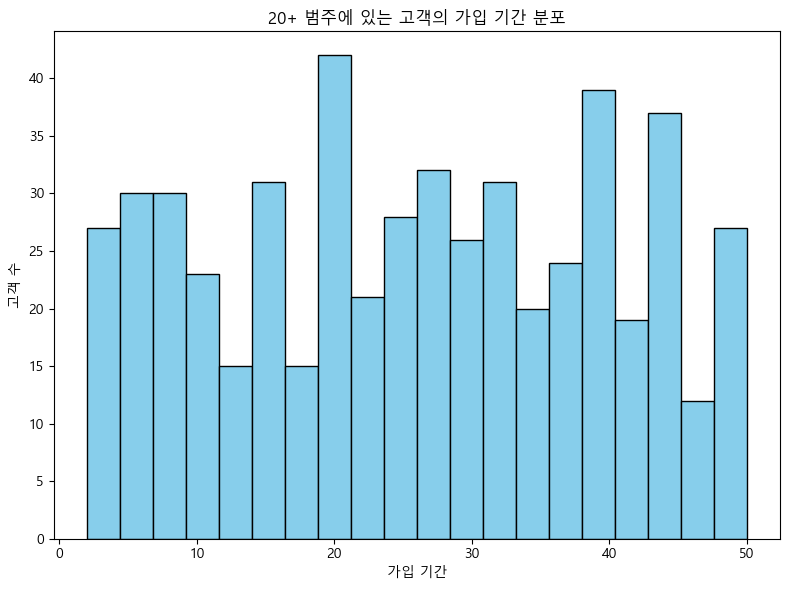

In [54]:
# 가입 기간 분포 시각화
plt.figure(figsize=(8, 6))
plt.hist(freq_20plus_customers['Membership_Duration'], bins=20, color='skyblue', edgecolor='black')
plt.title('20+ 범주에 있는 고객의 가입 기간 분포')
plt.xlabel('가입 기간')
plt.ylabel('고객 수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Monetary 

In [55]:
Monetary_data = pd.read_csv('Monetary.csv')
Monetary_data

,Customer_ID,Gender,Customer_Region,Membership_Duration,Total_Purchase_Amount
0,USER_1358,남,Chicago,12,37714.02
1,USER_0190,남,California,43,3364.75
2,USER_0066,남,Chicago,33,3118.75
3,USER_0345,여,California,30,7.74
4,USER_0683,남,California,49,1108.10
...,...,...,...,...,...
995,USER_0862,남,Chicago,22,5609.75
996,USER_0921,여,Chicago,16,31.69
997,USER_0237,여,Chicago,50,1389.49
998,USER_1027,여,California,20,2305.52


In [56]:
# Monetary 계산
monetary_df = Monetary_data.groupby('Customer_ID')['Total_Purchase_Amount'].sum().reset_index()
monetary_df.columns = ['Customer_ID', 'Monetary']
monetary_df

,Customer_ID,Monetary
0,USER_0001,14500.04
1,USER_0002,1639.27
2,USER_0006,7607.29
3,USER_0008,10721.99
4,USER_0009,5547.91
...,...,...
995,USER_1462,74.56
996,USER_1463,822.67
997,USER_1464,2995.47
998,USER_1465,153.06


In [57]:
# 5단계로 구분
monetary_df['Monetary_Segment'] = pd.qcut(monetary_df['Monetary'], q=5, labels=False)

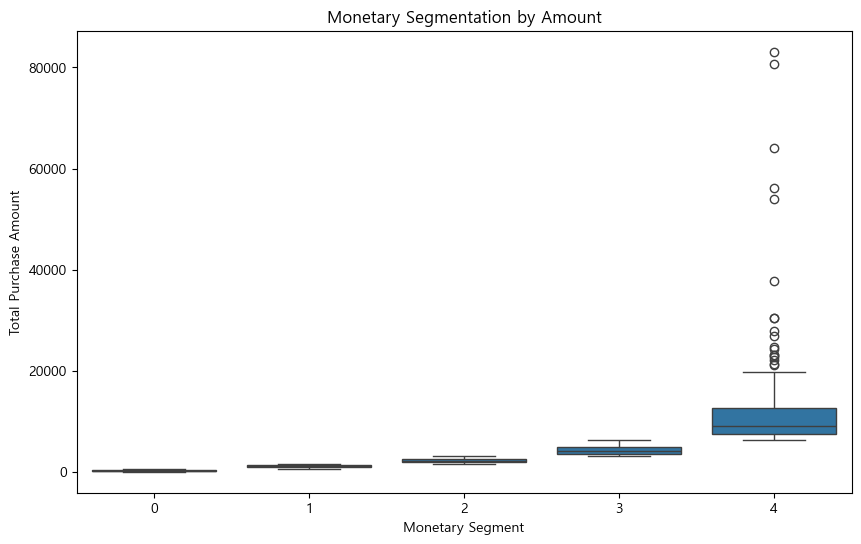

In [58]:
# Monetary 단계에 따른 금액 차이 시각화
plt.figure(figsize=(10,6))
sns.boxplot(x='Monetary_Segment', y='Monetary', data=monetary_df)
plt.title('Monetary Segmentation by Amount')
plt.xlabel('Monetary Segment')
plt.ylabel('Total Purchase Amount')
plt.show()

In [59]:
# 이상치 제거
Q1 = monetary_df['Monetary'].quantile(0.25)
Q3 = monetary_df['Monetary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
monetary_df = monetary_df[(monetary_df['Monetary'] > lower_bound) & (monetary_df['Monetary'] < upper_bound)]

In [60]:
# 5단계로 구분
monetary_df['Monetary_Segment'] = pd.qcut(monetary_df['Monetary'], q=5, labels=False)

C:\Windows\Temp\ipykernel_10504\737519971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monetary_df['Monetary_Segment'] = pd.qcut(monetary_df['Monetary'], q=5, labels=False)


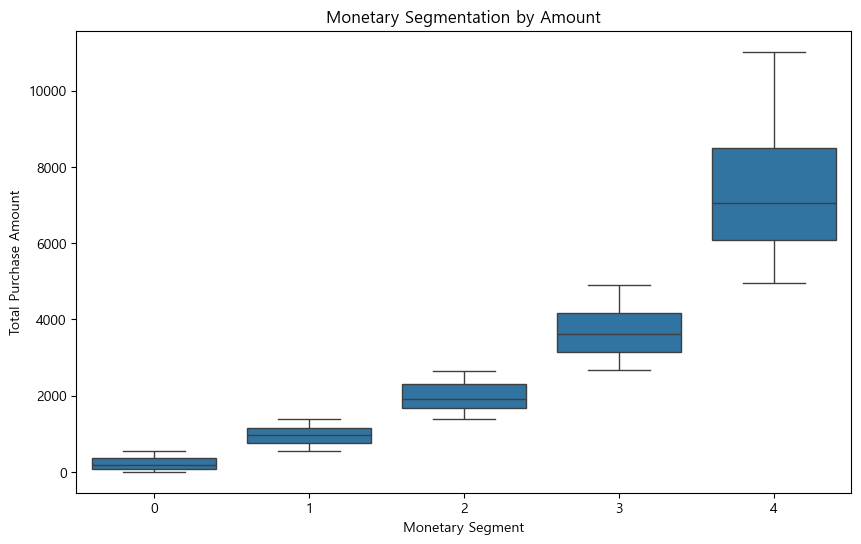

In [61]:
# Monetary 단계에 따른 금액 차이 시각화
plt.figure(figsize=(10,6))
sns.boxplot(x='Monetary_Segment', y='Monetary', data=monetary_df)
plt.title('Monetary Segmentation by Amount')
plt.xlabel('Monetary Segment')
plt.ylabel('Total Purchase Amount')
plt.show()

In [62]:
# 4단계에 해당하는 고객의 Customer_ID 가져오기
segment_4_customers = monetary_df[monetary_df['Monetary_Segment'] == 3]['Customer_ID']

In [63]:
# 4단계에 해당하는 고객들의 정보 가져오기
segment_4_customer_info = Monetary_data[Monetary_data['Customer_ID'].isin(segment_4_customers)]

In [64]:
# 각 성별에 해당하는 고객 수 계산
female_count = Monetary_data[Monetary_data['Gender'] == '여'].shape[0]
male_count = Monetary_data[Monetary_data['Gender'] == '남'].shape[0]
print('남 : ', male_count, '여 : ', female_count)

남 :  366 여 :  634


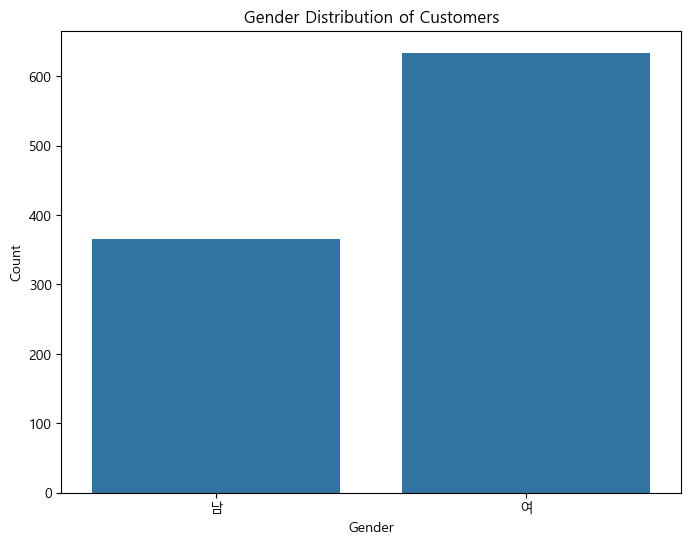

In [65]:
# 성별 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=Monetary_data)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


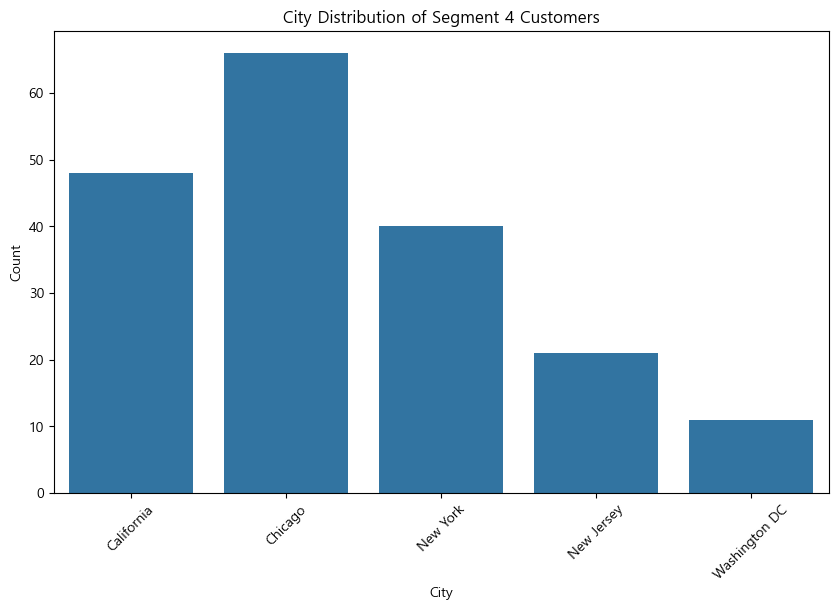

In [66]:
# 지역 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Region', data=segment_4_customer_info)
plt.title('City Distribution of Segment 4 Customers')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()